In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# Read data
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/HandwrittenData.csv").astype('float32')
x = dataset.drop('0', axis = 1)
y = dataset['0']


In [ ]:
# Reshape data - can be displayed as img
x = np.reshape(x.values, (x.shape[0], 28,28))

# Split data
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

Train data shape:  (260715, 28, 28)
Test data shape:  (55868, 28, 28)


In [ ]:
# Classes labels
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

n


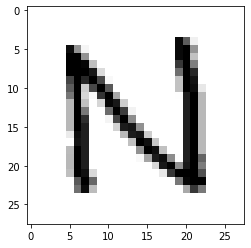

In [ ]:
# Show image
plt.imshow(x_train[0], cmap='gray_r')
label = int(y_train.iloc[0])
# print(y_train.shape)
print(classes[label])

In [ ]:
# Prepare loader - Reshape data - can be put in the model
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data: ", X_train.shape)

X_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
print("New shape of val data: ", X_val.shape)

X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data: ", X_test.shape)

Y_train = to_categorical(y_train, num_classes=26, dtype='int')
print("New shape of train labels: ", Y_train.shape)

Y_val = to_categorical(y_val, num_classes=26, dtype='int')
print("New shape of val labels: ", Y_val.shape)

Y_test = to_categorical(y_test, num_classes=26, dtype='int')
print("New shape of test labels: ", Y_test.shape)

print("shape test", X_test[0].shape)

New shape of train data:  (260715, 28, 28, 1)
New shape of val data:  (55867, 28, 28, 1)
New shape of test data:  (55868, 28, 28, 1)
New shape of train labels:  (260715, 26)
New shape of val labels:  (55867, 26)
New shape of test labels:  (55868, 26)
shape test (28, 28, 1)


In [ ]:
# Create model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
# Compile and fit model
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=1,  validation_data = (X_val,Y_val))

8148/8148 [==============================] - 44s 4ms/step - loss: 0.1625 - accuracy: 0.9559 - val_loss: 0.0710 - val_accuracy: 0.9802


In [ ]:
# Save model
model.summary()
model.save('modelHandwritten.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
history.history

{'loss': [0.16247855126857758],
 'accuracy': [0.9559403657913208],
 'val_loss': [0.07095833122730255],
 'val_accuracy': [0.9802029728889465]}

In [ ]:
# Prepare data test
def prepare_datatest(data):
  result = data.reshape(1, data.shape[0], data.shape[1], data.shape[2])
  return result

# Process data after testing
def class_predict(data):
  res = np.where(data == np.amax(data))
  index = int(res[1])
  return classes[index]

# Test model
def test_model(datatest, label):
  img = datatest.reshape(datatest.shape[0], datatest.shape[1])
  pred = model.predict(prepare_datatest(datatest))
  plt.imshow(img, cmap='gray_r')
  print("Model predict:", class_predict(pred))
  print("Value test:", classes[int(label)])
  msg = "Accurate prediction!" if class_predict(pred) == classes[int(label)] else "Wrong prediction!" 
  print(msg)



1/1 [==============================] - 0s 140ms/step
Model predict: o
Value test: o
Accurate prediction!


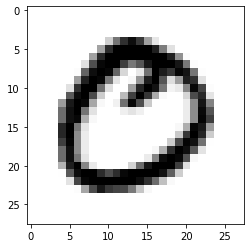

In [ ]:
test_model(X_test[0], y_test.iloc[0])